
# Assignment: Predict Housing Prices


Use the "[Housing Prices Dataset](https://www.kaggle.com/datasets/yasserh/housing-prices-dataset)" to predict house prices. This assignment will help you practice data loading, cleaning, preprocessing, feature engineering, visualization, and modeling.
Instructions:

1. Use Google Colab for this assignment.
2. Download and Load the dataset and follow the questions step by step.
3. Submit your completed notebook with code, outputs, and explanations.

In [ ]:
#Load the dataset into your notebook.
import kagglehub
import pandas as pd
# Download latest version
path = kagglehub.dataset_download("yasserh/housing-prices-dataset")
print("Path to dataset files:", path)

#Display the first five rows of the dataset.
df=pd.read_csv("/root/.cache/kagglehub/datasets/yasserh/housing-prices-dataset/versions/1/Housing.csv")
df.head()


Path to dataset files: /root/.cache/kagglehub/datasets/yasserh/housing-prices-dataset/versions/1


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished




Use appropriate methods to:

1. Check the structure of the dataset.
2. Summarize the numerical and categorical features.

Questions:

    1. How many rows and columns are in the dataset?
    2. What data types are present?
    3. Are there any columns that need to be renamed for better understanding?

#Answer:   
1.   545 rows and 13 columns
2.   Integer type and object type.
3.   Three columns are needed to be renamed for better understanding since they are long words. Those column names are: hotwaterheating, airconditioning and furnishingstatus and these columns can be renamed to hot_water_heating, air_condioning and furnishing_status.



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


**Identify missing values in the dataset.**

    >>> For numerical columns, use mean/median imputation.
    >>> For categorical columns, use mode or a placeholder.

Questions:

    1. How many missing values are present in each column?
    2. Which strategy did you use to fill missing values and why?
  
#Answer:

There is no missing value.

In [ ]:

missing_counts = df.isnull().sum()
print(missing_counts)
df1=df

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


**Data Preprocessing**

    1. Identify and encode the categorical columns.
        >>>Use one-hot encoding or label encoding.

    2. Normalize or scale the numerical columns.

    Questions:
        Which columns did you encode, and why did you choose the specific encoding method?
        Which columns did you scale, and what scaler did you use?
#Answer:
      
      1.   Encoded columns: 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus'. One-Hot encoding is selected because these columns have no ordinal values, they only contain binary values.
      2.   Scaled columns: 'price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking'. Min-max scaler is used.

In [ ]:

import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, OneHotEncoder


cat_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
num_cols = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']

encoder = OneHotEncoder(sparse_output=False)

one_hot_encoded = encoder.fit_transform(df[cat_cols])

one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(cat_cols))

df_encoded = pd.concat([df, one_hot_df], axis=1)

df = df_encoded.drop(cat_cols, axis=1)

# encoder = LabelEncoder()

# for col in cat_cols:
#     df[col] = encoder.fit_transform(df[col])

scaler = MinMaxScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

df.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,...,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,0.396564,0.6,0.333333,0.666667,0.666667,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
1,12250000,0.502405,0.6,1.000000,1.000000,1.000000,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
2,12250000,0.571134,0.4,0.333333,0.333333,0.666667,0.0,1.0,1.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,12215000,0.402062,0.6,0.333333,0.333333,1.000000,0.0,1.0,1.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
4,11410000,0.396564,0.6,0.000000,0.333333,0.666667,0.0,1.0,0.0,1.0,...,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   price                            545 non-null    int64  
 1   area                             545 non-null    float64
 2   bedrooms                         545 non-null    float64
 3   bathrooms                        545 non-null    float64
 4   stories                          545 non-null    float64
 5   parking                          545 non-null    float64
 6   mainroad_no                      545 non-null    float64
 7   mainroad_yes                     545 non-null    float64
 8   guestroom_no                     545 non-null    float64
 9   guestroom_yes                    545 non-null    float64
 10  basement_no                      545 non-null    float64
 11  basement_yes                     545 non-null    float64
 12  hotwaterheating_no    

# Feature Engineering

    1. Create at least two new features based on the existing ones.
        Example: Calculate "Price per Square Foot."

    2. Remove any irrelevant or redundant features.

    Questions:
        Did you drop any features? Why or why not?
# Answer
 "stories" column is droped because it is negatively correlated to "parking" and "area" features.
  

Text(0.5, 1.0, 'Correlation Heatmap')

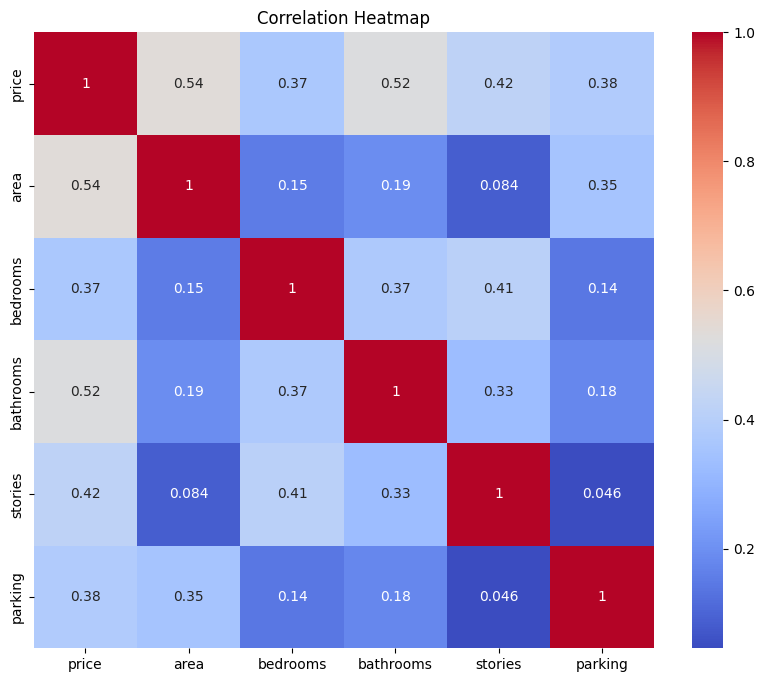

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
numerical_df = df1.select_dtypes(include=["number"])
corr=numerical_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')

In [ ]:
df['area_per_room']=df['area']/((df['bedrooms'] + df['bathrooms'])+1)
df["total_rooms"] = (df["bedrooms"] + df["bathrooms"])
df["area_per_stories"] = df['area']/(df['stories']+1)
df["rooms_per_stories"] = (df["bedrooms"] + df["bathrooms"])/(df['stories']+1)
df=df.drop('stories',axis=1)


# Visualization

    Create visualizations to explore the dataset:
        1. Plot the distribution of house prices.
        2. Create a scatter plot showing the relationship between house area and price.
        3. Use a heatmap to show correlations between numerical features.
    Questions:
        What insights did you gain from the distribution of house prices?
        Which features are most strongly correlated with the target variable?
  
#Answers:
        1. From the histogram of the Price column, we can say that its distribution is right skewed/positively skewed. Representing most of the values are in the lower price range.
        2. No feature is strongly correlated to the target variable.

Text(0.5, 1.0, 'Histogram of Price')

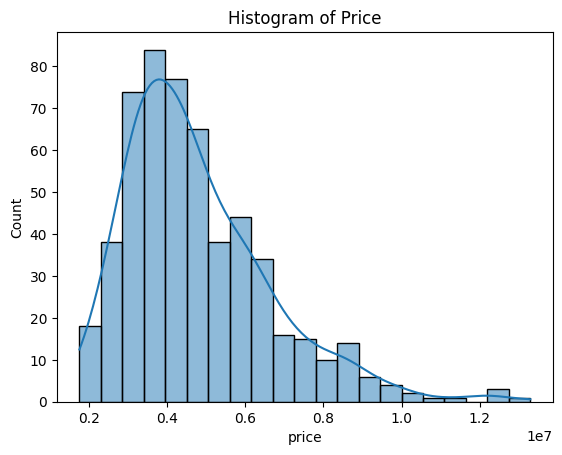

In [ ]:
sns.histplot(df['price'], kde=True)
plt.title("Histogram of Price")

<Axes: xlabel='area', ylabel='price'>

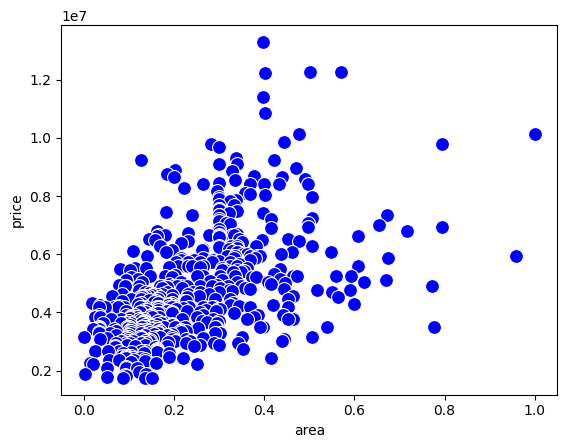

In [ ]:
sns.scatterplot(x='area', y='price', data=df, color='blue', s=100)

Text(0.5, 1.0, 'Correlation Heatmap')

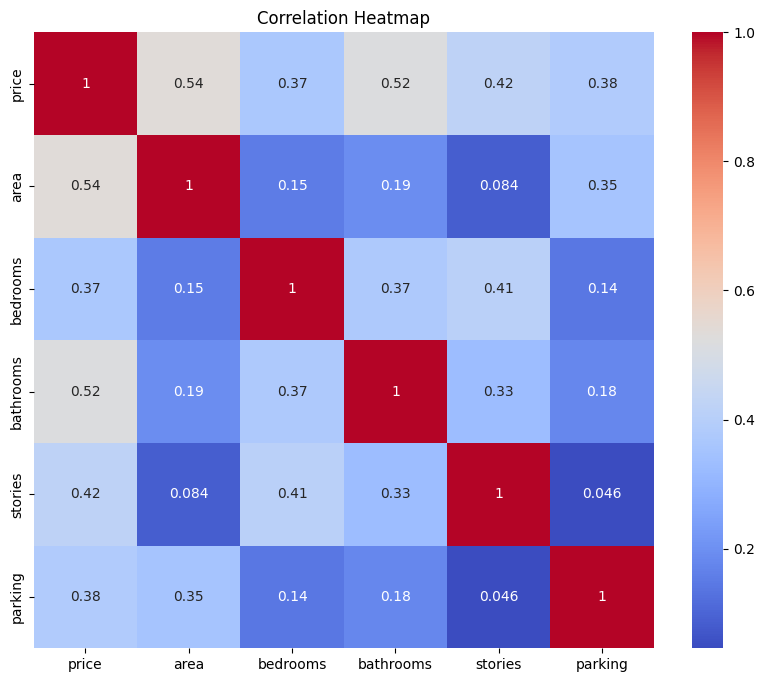

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
numerical_df = df1.select_dtypes(include=["number"])
corr=numerical_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')

# Model Building

    Split the dataset into training and testing sets (80% train, 20% test).

    Train and evaluate the following models:
        Linear Regression
        Random Forest Regressor

    Use Mean Squared Error (MSE) or another appropriate metric to evaluate the models.

    Questions:
        Which model performed the best on the test set?
        What were the MSE values for each model?
        Why do you think the best-performing model outperformed the others?
# Answer

Linear Regression model performed best.

MSE values of Linear Regression : 1703214565595.9082
MSE values of Random Forest Regressor : 2143973835165.571

Linear regression model outperformed others because the dataset has a linear relationship between the features and target variable. Also Random Forest Regressor tend to become overfit in the small dataset and when the dataset has few features. Because its decision stands based on multiple decision trees outcome. So small number of features make the prediction harder for Random Forest Regressor. That's why, due to utilizing low amount of features, Random Forest Regressor performed worse than Linear Regression.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


y = df['price']
X = df.drop('price', axis=1)



In [ ]:
# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Linear Regression Model
linear_reg = LinearRegression()

# Train the model
linear_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred_linear = linear_reg.predict(X_test)

# Evaluate the Linear Regression model
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print(f"Linear Regression - MSE: {mse_linear}, R²: {r2_linear}")

# 3. Random Forest Regressor Model
rf_regressor = RandomForestRegressor(n_estimators=1000, min_samples_leaf=5,random_state=42)

# Train the model
rf_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_regressor.predict(X_test)

# Evaluate the Random Forest model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest Regressor -> MSE: {mse_rf}, R²: {r2_rf}")


Linear Regression - MSE: 1703214565595.9082, R²: 0.6630347423062224
Random Forest Regressor -> MSE: 2143973835165.571, R²: 0.5758345950954691


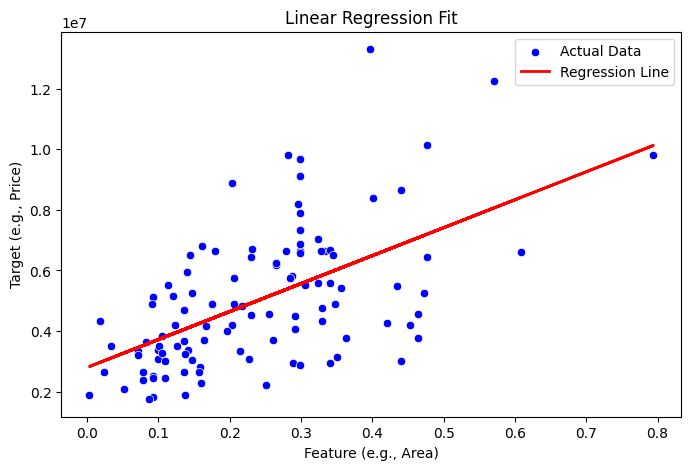

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression

# Assuming X is a single feature (e.g., 'area') and y is 'price'
X_feature = X_test.iloc[:, 0].values.reshape(-1, 1)  # Selecting the first feature
y_actual = y_test.values  # Actual target values

# Fit Linear Regression for visualization
regressor = LinearRegression()
regressor.fit(X_feature, y_actual)
y_pred = regressor.predict(X_feature)

# Plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_feature.flatten(), y=y_actual, color='blue', label="Actual Data")
plt.plot(X_feature, y_pred, color='red', linewidth=2, label="Regression Line")

plt.xlabel("Feature (e.g., Area)")
plt.ylabel("Target (e.g., Price)")
plt.title("Linear Regression Fit")
plt.legend()
plt.show()


# Summary

    Summarize your findings:
        Discuss your approach to data cleaning and preprocessing.
        Highlight the key insights from your visualizations.
        Justify your choice of the best model.

    Question:
        What would you do differently if given more time or resources?
#Answer

If I had more time, then I would have used more models and implemented hyperparameter tunning (GridSearchCV, RandomizedSearchCV) methods to improve those models' performances. I could have also used the hyperparameter-tuned ensembled model to find out the best accuracy in predicting the prices.

If I had more resources, then I would discover more features using feature engineering techniques. Also, I would use dimensionality reduction methods like PCA to determine the best features to forecast the price values.

In [ ]:
#write your code